Importing all the dependencies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#to check the accuracy of the model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV



Read Dataset


In [2]:
#Read dataset into pandas dataframe
df=pd.read_csv('winequality-red.csv')

Check Dataset

In [3]:
#check the number of rows and columns
df.shape

(1599, 12)

In [4]:
#to check the first 5 rows of data set
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#check missing values in the data set
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

EDA & Visualization

In [8]:
#EDA/Visualization
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Range of Quality of wine.

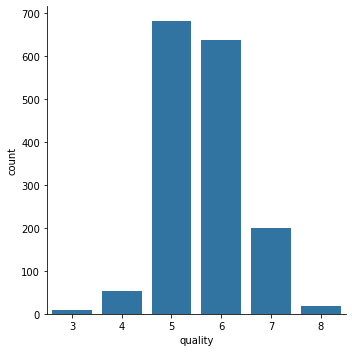

In [10]:
#number of values for each quality
sns.catplot(x='quality', data = df,kind= 'count')


In [61]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Target Variable Analysis

In [11]:
import plotly.graph_objects as go

temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), height=500, width=1000))

target = df[['quality']].value_counts(normalize=True).sort_index().round(decimals=3)*100
pal, color=['#FF9999', '#FFCC99', '#FFFF99', '#99FF99', '#99CCFF', '#FF99FF'], ['#FF9999', '#FFCC99', '#FFFF99', '#99FF99', '#99CCFF', '#FF99FF']
fig=go.Figure()

fig.add_trace(go.Pie(labels=target.index, values=target, hole=.5, 
                     showlegend=True,sort=False, 
                     marker=dict(colors=color,line=dict(color=pal,width=2.5)),
                     hovertemplate = "%{label} Transported: %{value:.2f}%<extra></extra>"))

fig.update_layout(template=temp, title='Target Distribution', 
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',height=500)
fig.show()

In the above bar plot we can see that we have 6 quality values.
range is from 1 to 10, we have Lowest Quality is 3 and Highest is 9.
We can see that in above chart, most of the wines have Rating 6 and it is followd by 5 and 7

In [12]:
quality_counts = df['quality'].value_counts()
print(quality_counts)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


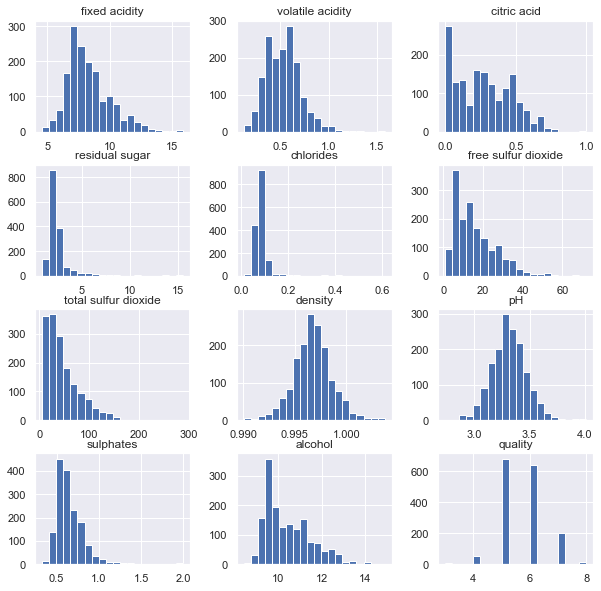

In [62]:

df.hist(bins=20, figsize=(10, 10))
plt.show()

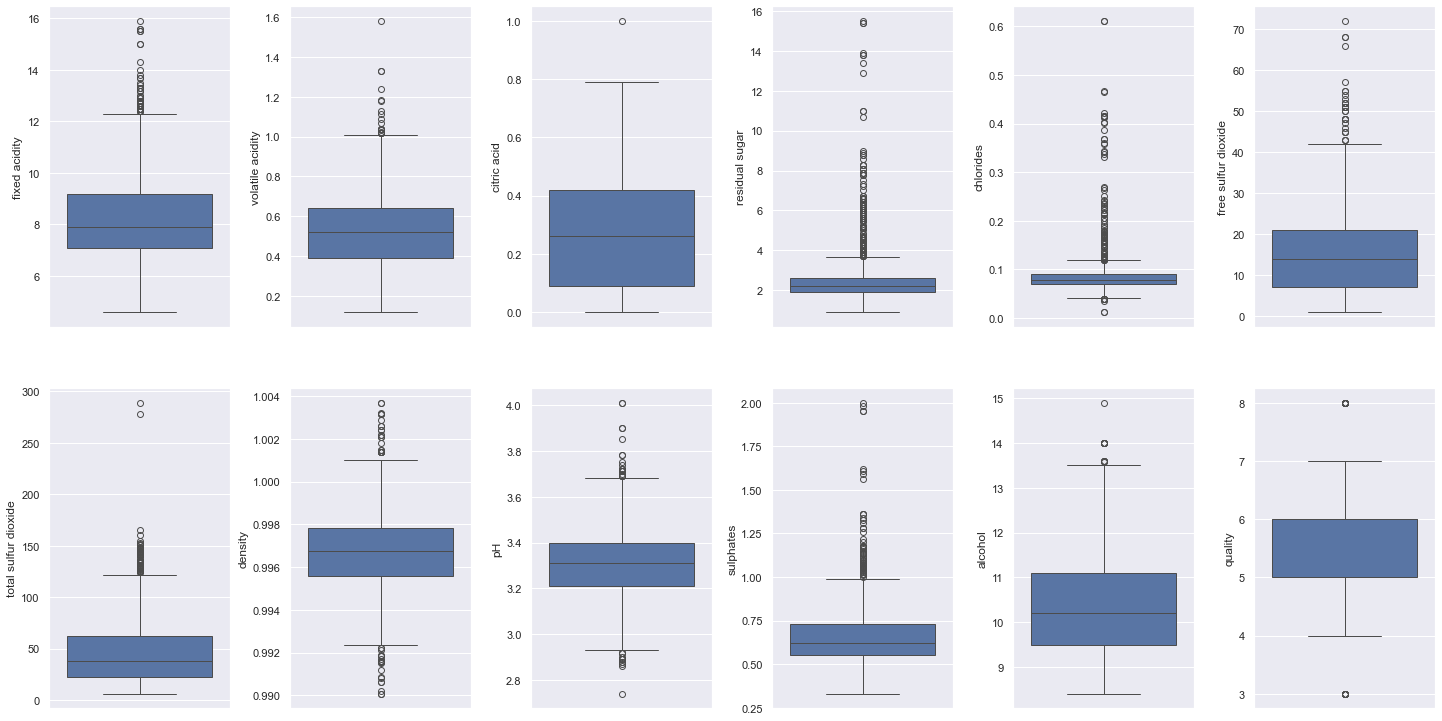

In [63]:
#lets see whether our data has outliers or not:

# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, color='b', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [64]:
def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

df = mod_outlier(df)

C:\Users\hp\AppData\Local\Temp\ipykernel_33508\2854119420.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hp\AppData\Local\Temp\ipykernel_33508\2854119420.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



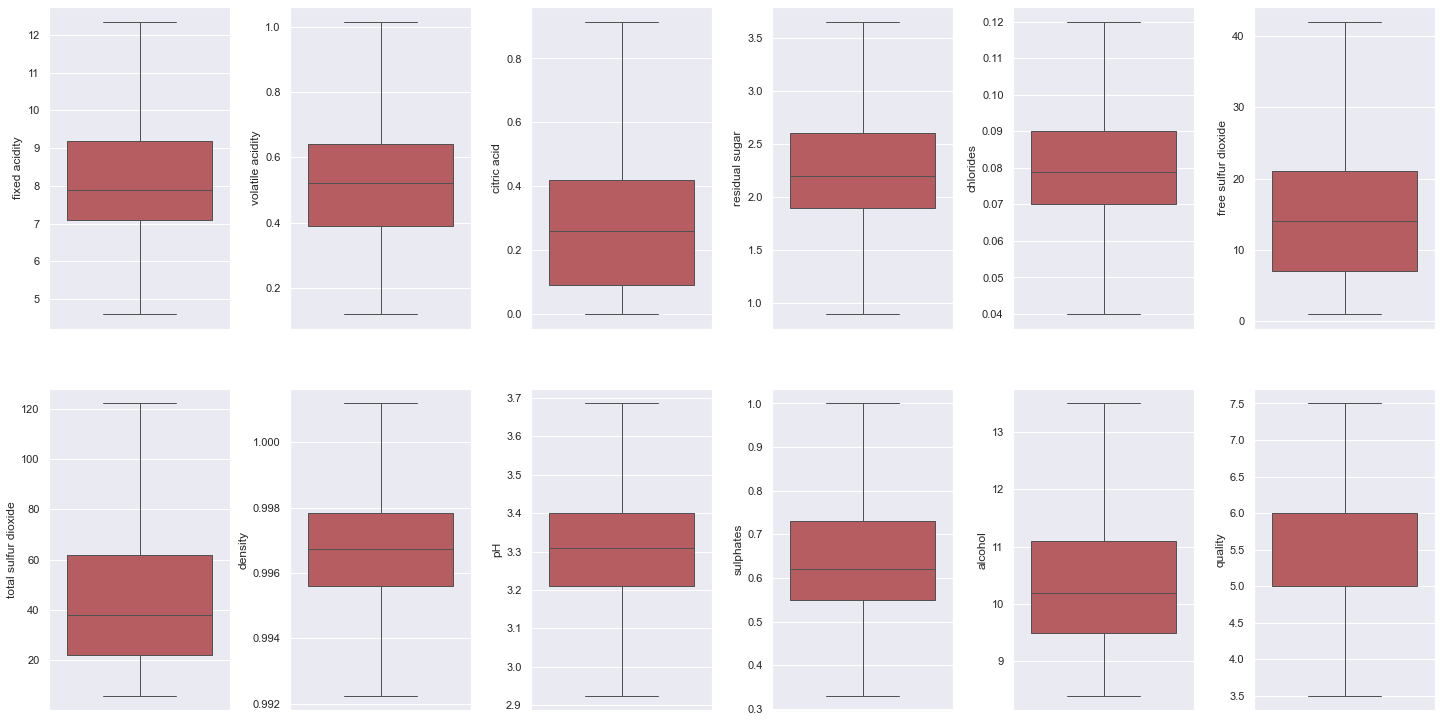

In [65]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, color='r', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

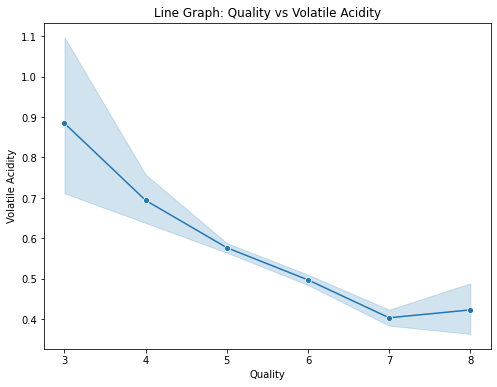

In [13]:
#Effect of Volatile Acidity with Quality
plt.figure(figsize=(8, 6))
sns.lineplot(x='quality', y='volatile acidity', data=df, marker='o')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.title('Line Graph: Quality vs Volatile Acidity')
plt.show()

We can see that the if the volatile acidity is high then the quality of wine is low.For wine quality to be better it should be arounf 0.4.
hence it is inversely propostional.
 

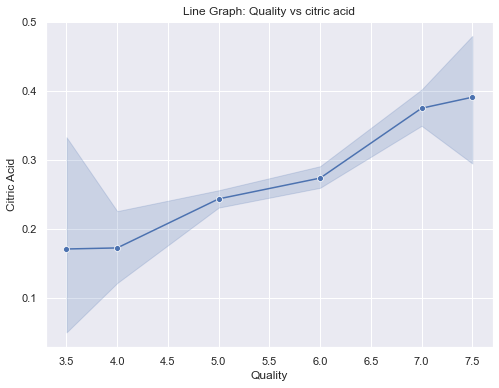

In [72]:
#to check co-relation of citric acid with the quality value citric acid
plt.figure(figsize=(8, 6))
sns.lineplot(x='quality', y='citric acid', data=df, marker='o')
plt.xlabel('Quality')
plt.ylabel('Citric Acid')
plt.title('Line Graph: Quality vs citric acid')
plt.show()

Just opposote of volatile acidity , Citric acid is directly propostional to quality.


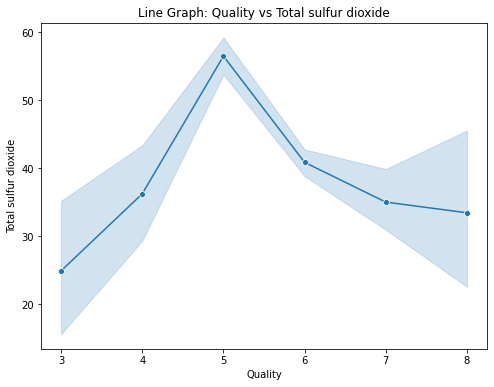

In [15]:
#effetc of sulphur dioxide with quality
plt.figure(figsize=(8, 6))
sns.lineplot(x='quality', y='total sulfur dioxide', data=df, marker='o')
plt.xlabel('Quality')
plt.ylabel('Total sulfur dioxide')
plt.title('Line Graph: Quality vs Total sulfur dioxide')
plt.show()

In [16]:
import plotly.graph_objects as go
import plotly.express as px
px.scatter(df, x="free sulfur dioxide", y="total sulfur dioxide",animation_frame="quality")

In [67]:
# Find correlation of all features with quality
correlation_matrix = df.corr()
quality_correlation = correlation_matrix['quality'].sort_values(ascending=False)

print("Correlation of features with quality:")
print(quality_correlation)

Correlation of features with quality:
quality                 1.000000
alcohol                 0.480641
sulphates               0.330712
citric acid             0.227717
fixed acidity           0.128373
residual sugar          0.024647
free sulfur dioxide    -0.052357
pH                     -0.059040
density                -0.174567
chlorides              -0.180356
total sulfur dioxide   -0.207643
volatile acidity       -0.388883
Name: quality, dtype: float64


Correlation Matrix

<Axes: >

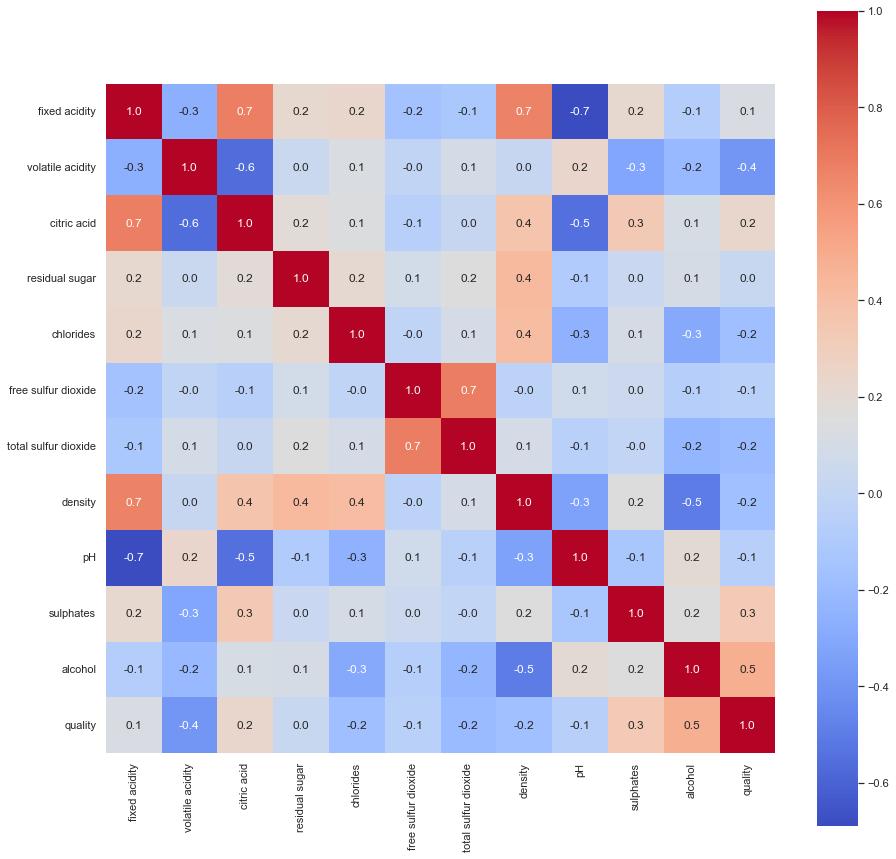

In [68]:
#heat map to understand the correlation
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':12}, cmap='coolwarm') 

C:\Users\hp\AppData\Local\Temp\ipykernel_33508\2398698211.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='alcohol', ylabel='Density'>

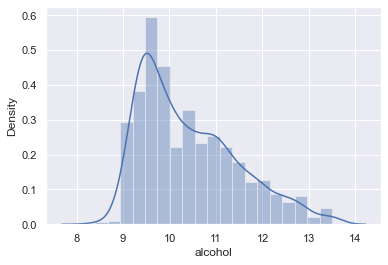

In [69]:
sns.distplot(df['alcohol'])

<Axes: xlabel='quality', ylabel='alcohol'>

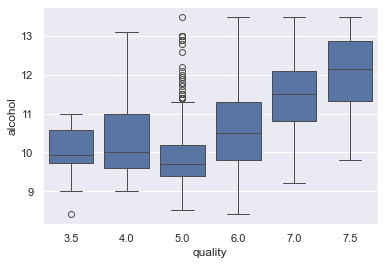

In [70]:
sns.boxplot(x='quality', y='alcohol', data = df)

<Axes: xlabel='quality', ylabel='alcohol'>

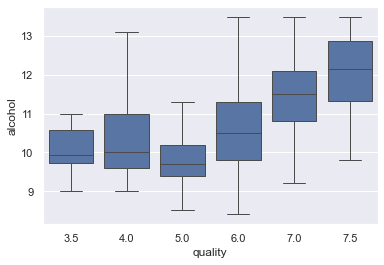

In [71]:
sns.boxplot(x='quality', y='alcohol', data = df, showfliers=False)

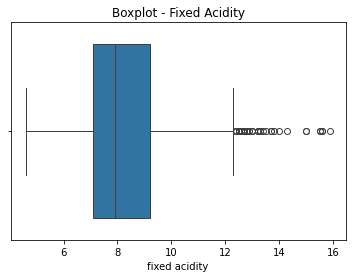

Outliers for 'fixed acidity':
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
205            12.8             0.300         0.74             2.6      0.095   
206            12.8             0.300         0.74             2.6      0.095   
243            15.0             0.210         0.44             2.2      0.075   
244            15.0             0.210         0.44             2.2      0.075   
264            12.5             0.560         0.49             2.4      0.064   
294            13.3             0.340         0.52             3.2      0.094   
328            13.4             0.270         0.62             2.6      0.082   
338            12.4             0.490         0.58             3.0      0.103   
339            12.5             0.280         0.54             2.3      0.082   
347            13.8             0.490         0.67             3.0      0.093   
353            13.5             0.530         0.79             4.8      0.120  

In [19]:

# Boxplot to visualize outliers for 'fixed acidity'
sns.boxplot(x=df['fixed acidity'])
plt.title('Boxplot - Fixed Acidity')
plt.show()

Q1 = df['fixed acidity'].quantile(0.25)
Q3 = df['fixed acidity'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['fixed acidity'] < lower_bound) | (df['fixed acidity'] > upper_bound)]
print("Outliers for 'fixed acidity':")
print(outliers)
cleaned_df = df[(df['fixed acidity'] >= lower_bound) & (df['fixed acidity'] <= upper_bound)]


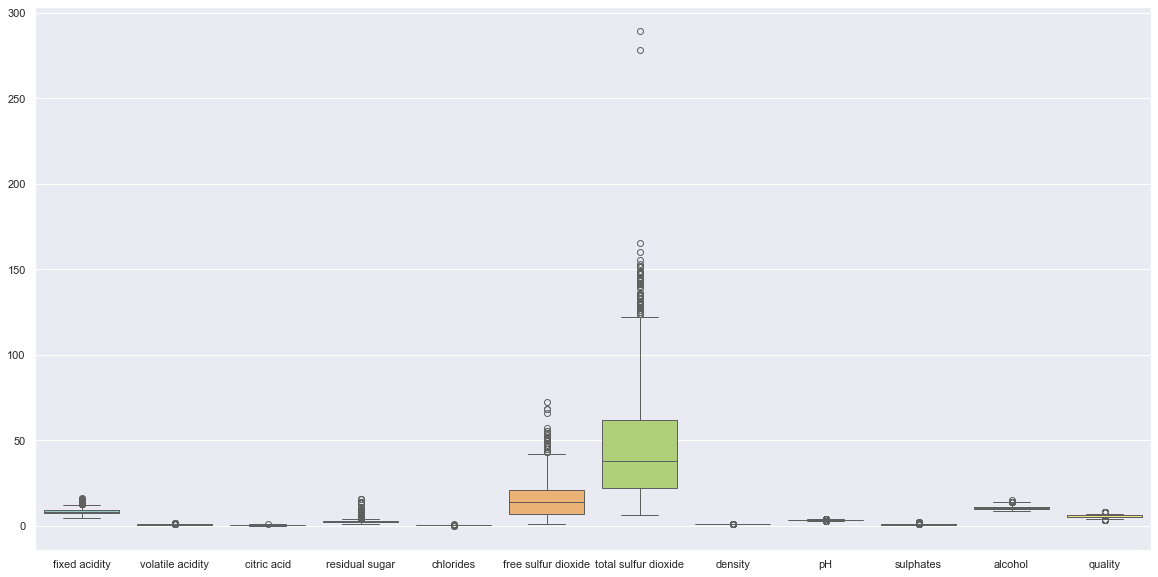

In [20]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=df,palette="Set3")
plt.show()

In [21]:
lower_limit = df["free sulfur dioxide"].mean() - 3*df["free sulfur dioxide"].std()
upper_limit = df["free sulfur dioxide"].mean() + 3*df["free sulfur dioxide"].std()

In [22]:
print(lower_limit,upper_limit)

-15.505549083287839 47.25539273557052


Data Preprocessing

In [23]:
#separate the data and label
X= df.drop('quality',axis=1)


In [24]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [25]:
X.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [26]:
#lable Binarization
y = df['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [28]:
y_counts=y.value_counts()
y_counts


0    1382
1     217
Name: quality, dtype: int64

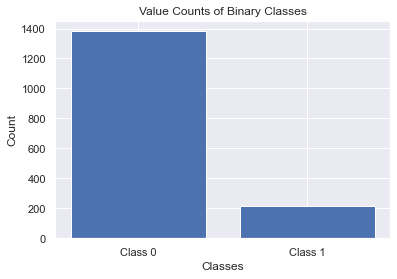

In [29]:
# Plotting the value counts
plt.bar(y_counts.index, y_counts.values)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Value Counts of Binary Classes')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

There is class imbalnce we can see the ratio os roughly around 6:1

To Solve the problem we will convert the binary classificatio to multi class classification

In [30]:
def categorize_quality(quality_value):
    if quality_value <= 4:
        return 'Low'  # Classify as 'Low' quality
    elif 5 <= quality_value <= 6:
        return 'Medium'  # Classify as 'Medium' quality
    else:
        return 'High' 

In [31]:
y=df['quality'].apply(categorize_quality)

In [32]:
y

0       Medium
1       Medium
2       Medium
3       Medium
4       Medium
         ...  
1594    Medium
1595    Medium
1596    Medium
1597    Medium
1598    Medium
Name: quality, Length: 1599, dtype: object

In [33]:
y_counts=y.value_counts()
y_counts

Medium    1319
High       217
Low         63
Name: quality, dtype: int64

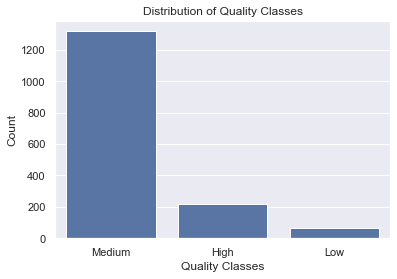

In [34]:
sns.barplot(x=y_counts.index, y=y_counts.values)
plt.xlabel('Quality Classes')
plt.ylabel('Count')
plt.title('Distribution of Quality Classes')
plt.show()

In [35]:
#Split data
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [36]:
# Applying SMOTE for oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [37]:
y_counts = y_resampled.value_counts()

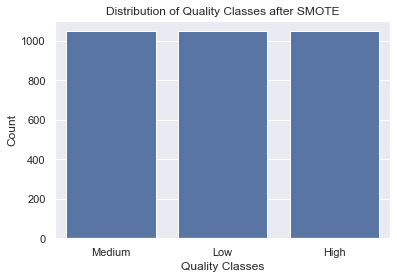

In [38]:
sns.barplot(x=y_counts.index, y=y_counts.values)
plt.xlabel('Quality Classes')
plt.ylabel('Count')
plt.title('Distribution of Quality Classes after SMOTE')
plt.show()

In [39]:
y_resampled.value_counts()

Medium    1050
Low       1050
High      1050
Name: quality, dtype: int64

In [40]:
y_test.value_counts()

Medium    269
High       41
Low        10
Name: quality, dtype: int64

In [41]:
print(y.shape,y_resampled.shape,y_test.shape)

(1599,) (3150,) (320,)


Cross Vslidaiton to check which model gives the best Accuracy


In [42]:
#3. perform cross validation with a selected set of models, to scope down which model is among the best

#3.1 specify the list of algorithms
#this is for classification
##Baselines
import warnings
from sklearn.linear_model import LogisticRegression  #drawing a line based on linear regression but used for classification
from sklearn.naive_bayes import GaussianNB  #drawing a line based on probability
from sklearn.exceptions import ConvergenceWarning


##Situational (but we don't use much)
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore', category=ConvergenceWarning)

##Complex
from sklearn.ensemble import RandomForestClassifier  #using trees to classify
from sklearn.svm import SVC  #drawing a line based on maximum distance
from sklearn.ensemble import GradientBoostingClassifier  #<<-------is the MOST complex
    #XGBoost but is not in sklearn, import XGBoost #<---most powerful algorithm for tabular data (not images, signal)

#any random_state you can use......up to you 
lr = LogisticRegression(random_state=999)
rf = RandomForestClassifier(random_state=999)
sv = SVC(random_state=999)

models = [lr, rf, sv]

#3.2 perform cross validation using KFold
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 5, shuffle = True, random_state=999)

score_std = []
for model in models:
    score = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring='accuracy')  #f1, recall, precision, accuracy
    print("Scores: ", score, "- Scores mean: ", score.mean(), "- Scores std (lower better): ", score.std())  #out of 1 ; 1 means perfect accuracy
    score_std.append(score.std())
    #lr, rf, sv



Scores:  [0.68888889 0.64761905 0.71111111 0.69206349 0.6952381 ] - Scores mean:  0.686984126984127 - Scores std (lower better):  0.02111528780738525
Scores:  [0.94603175 0.92539683 0.92857143 0.92857143 0.94126984] - Scores mean:  0.933968253968254 - Scores std (lower better):  0.008130951412613113
Scores:  [0.5952381  0.54761905 0.59365079 0.57936508 0.61746032] - Scores mean:  0.5866666666666667 - Scores std (lower better):  0.023015325663989648


Comparision of Score Standard Daviation 


#when they are very close, 
    #how we choose?  we choose the simplest model...
    #what does simplest mean?  LogisticRegression is simplest, and SVM is the most complex....
    
#overfitting vs. underfitting
#overfitting means your model learns too much about the training set, 
    #so it cannot generalize to validation set or testing set (unseen data)
    #is NOT good - it means your model CANNOT GENERALIZE to unseen data (validation or test set)
    
#underfitting means your model just fail to see any patterns in the training set
    #this is easy: just look at score
    


C:\Users\hp\AppData\Local\Temp\ipykernel_33508\1711641602.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


C:\Users\hp\AppData\Local\Temp\ipykernel_33508\1711641602.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hp\AppData\Local\Temp\ipykernel_33508\1711641602.py:5: UserWarning:

The palette list has more values (10) than needed (3), which may not be intended.



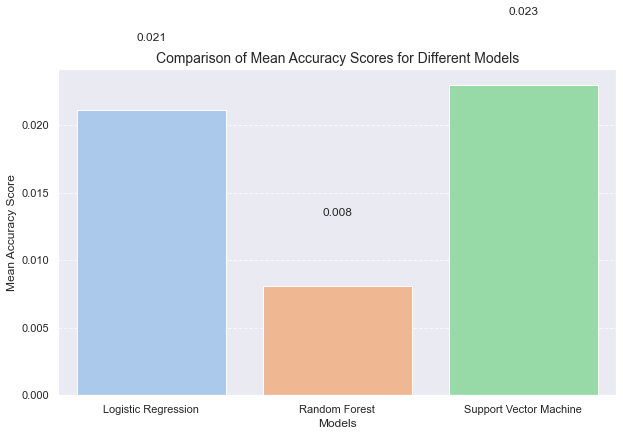

In [43]:
colors = sns.color_palette('pastel')

plt.figure(figsize=(10, 6))

sns.barplot(x=['Logistic Regression', 'Random Forest', 'Support Vector Machine'],
            y=score_std, ci='sd', palette=colors)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlabel('Models', fontsize=12)
plt.ylabel('Mean Accuracy Score', fontsize=12)
plt.title('Comparison of Mean Accuracy Scores for Different Models', fontsize=14)

for i, score in enumerate(score_std):
    plt.text(i, score + 0.005, f'{score:.3f}', ha='center', va='bottom')

plt.show()

In [44]:
model = RandomForestClassifier(random_state=999)

# Define the parameters to search through
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['auto', 'sqrt']  # Remove this line or set explicitly to 'sqrt'
}

# Create a grid search object
grid = GridSearchCV(model, param_grid, scoring="accuracy", cv=5, refit=True, return_train_score=True)

# Fit the grid search to the data (use only training set here)
grid.fit(X_resampled, y_resampled)

# Print the best parameters and best score
print("Best Parameters: ", grid.best_params_)
print("Best Accuracy Score: ", grid.best_score_)

# Get all results
print(grid.cv_results_)

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Accuracy Score:  0.9273015873015872
{'mean_fit_time': array([0.50867682, 0.95376229, 1.40845275, 0.44800892, 0.8899807 ,
       1.37975922, 0.45505805, 0.92502966, 1.34864979, 0.44452634,
       0.88028779, 1.3840076 , 0.43705034, 0.89721699, 1.32460299,
       0.45173545, 0.85560455, 1.28731904, 0.41107841, 0.86249547,
       1.25963917, 0.41562138, 0.84058056, 1.23684011, 0.49122767,
       0.83148537, 1.26969743, 0.4108212 , 0.83707957, 1.24169812,
       0.41255364, 0.83761401, 1.29650478, 0.4511147 , 0.86221275,
       1.22412848, 0.40606041, 0.84717898, 1.23868346, 0.41290212,
       0.82694464, 1.20241284, 0.42338157, 0.79721437, 1.21521125,
       0.39351296, 0.79639211, 1.19856343, 0.38937955, 0.78828917,
       1.18956914, 0.38904238, 0.79509444, 1.16392632, 0.4712904 ,
       0.9205411 , 1.39008985, 0.46197038, 0.92765341, 1.38439245,
       0.45337291, 0.8749804 , 

In [45]:
best_params = grid.best_params_


In [46]:
final_model = RandomForestClassifier(**best_params, random_state=999)
final_model.fit(X_resampled, y_resampled)

RandomForestClassifier(n_estimators=300, random_state=999)

In [49]:
test_accuracy = final_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 0.84375


In [50]:
print("(samples, features): ", X_resampled.shape)
print("(samples,         ): ", y_resampled.shape)
print("(samples, features): ", X_test.shape)
print("(samples,         ): ", y_test.shape)

(samples, features):  (3150, 11)
(samples,         ):  (3150,)
(samples, features):  (320, 11)
(samples,         ):  (320,)


In [51]:
ypred = final_model.predict(X_test)

In [52]:
ypred.shape

(320,)

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [75]:
accuracy = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred, average='weighted')
recall = recall_score(y_test, ypred, average='weighted')
f1 = f1_score(y_test, ypred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Generate classification report
print(classification_report(y_test, ypred))

# Generate confusion matrix
cm = confusion_matrix(y_test, ypred)



Accuracy: 0.84375
Precision: 0.8659630924858572
Recall: 0.84375
F1 Score: 0.8525477398711991
              precision    recall  f1-score   support

        High       0.60      0.78      0.68        41
         Low       0.14      0.20      0.17        10
      Medium       0.93      0.88      0.90       269

    accuracy                           0.84       320
   macro avg       0.56      0.62      0.58       320
weighted avg       0.87      0.84      0.85       320



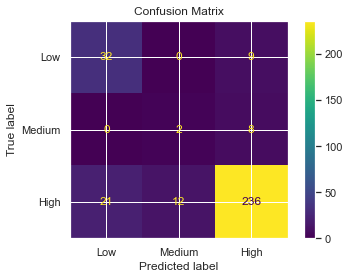

In [76]:
cm = confusion_matrix(y_test, ypred)
classes = ['Low', 'Medium','High'] 
cmp = ConfusionMatrixDisplay(cm, display_labels=classes)
cmp.plot()
plt.title('Confusion Matrix')
plt.show()

Building predictive system


In [56]:
X_resampled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,11.400000,0.360000,0.690000,2.100000,0.090000,6.000000,21.000000,1.000000,3.170000,0.620000,9.200000
1,5.900000,0.550000,0.100000,2.200000,0.062000,39.000000,51.000000,0.995120,3.520000,0.760000,11.200000
2,9.100000,0.280000,0.480000,1.800000,0.067000,26.000000,46.000000,0.996700,3.320000,1.040000,10.600000
3,7.200000,0.500000,0.180000,2.100000,0.071000,12.000000,31.000000,0.997610,3.520000,0.720000,9.600000
4,9.900000,0.720000,0.550000,1.700000,0.136000,24.000000,52.000000,0.997520,3.350000,0.940000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...
3145,8.173608,0.745366,0.309062,2.000000,0.083906,12.736077,59.527845,0.996924,3.298680,0.519062,10.060412
3146,7.873420,0.946577,0.027342,1.826580,0.064999,4.088600,8.088600,0.996984,3.372404,0.336202,9.259481
3147,8.248631,0.376473,0.284122,1.911755,0.084649,29.764896,48.661836,0.996334,3.418969,0.610596,9.977939
3148,8.545502,0.386160,0.312319,1.799113,0.098338,30.410648,48.000000,0.996789,3.409911,0.668568,9.959823


In [57]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
imput_data_as_array = np.asarray(input_data)
#reshape data
reshaped_data = imput_data_as_array.reshape(1, -1)
pred = final_model.predict(reshaped_data)
print("The Wine Quality is",pred)


The Wine Quality is ['High']


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [58]:
import pickle
pickle.dump(final_model,open('final_model.plk','wb+'))

In [59]:
final_model.predict(X_test)

array(['Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'High', 'High', 'High', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'High',
       'Medium', 'High', 'High', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'High',
       'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'Medium', 'Medium', 'High', 'Medium', 'Medium',
       'Medium', 'High', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium', 'M